# Mental Health Risk Prediction

In [224]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1 : Get the data

In [225]:
df = pd.read_csv('mental_health_dataset.csv')
df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


In [226]:
if df['mental_health_risk'].dtype == 'object':
    le = LabelEncoder()
    df['mental_health_risk'] = le.fit_transform(df['mental_health_risk'])

In [227]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

Duplicate Rows: 0


In [228]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Detect outliers using IQR
for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    print(f"{col}: {outliers.sum()} outliers")


age: 0 outliers
stress_level: 0 outliers
sleep_hours: 0 outliers
physical_activity_days: 0 outliers
depression_score: 0 outliers
anxiety_score: 0 outliers
social_support_score: 0 outliers
productivity_score: 0 outliers
mental_health_risk: 0 outliers


In [229]:
from sklearn.ensemble import IsolationForest

# Use numeric columns
X = numeric_cols.copy()

# Fit Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X)

# Count outliers (-1 means anomaly)
print("Anomalies detected by Isolation Forest:", list(outliers).count(-1))


Anomalies detected by Isolation Forest: 100


In [230]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original df
df_encoded = df.copy()

# Encode non-numeric target if needed
if df_encoded['mental_health_risk'].dtype == 'object':
    le = LabelEncoder()
    df_encoded['mental_health_risk'] = le.fit_transform(df_encoded['mental_health_risk'])

# Compute correlations including the encoded target
corr_with_target = df_encoded.corr(numeric_only=True)['mental_health_risk'].sort_values(ascending=False)
print("Correlation with Target (mental_health_risk):\n", corr_with_target)


Correlation with Target (mental_health_risk):
 mental_health_risk        1.000000
productivity_score        0.355313
social_support_score      0.009553
sleep_hours               0.005257
stress_level              0.000366
age                      -0.008832
physical_activity_days   -0.021678
anxiety_score            -0.245533
depression_score         -0.369709
Name: mental_health_risk, dtype: float64


In [231]:
# Dimensions
rows, cols = df.shape
print(f"Dataset has {rows} rows and {cols} columns")

# Size in memory
print("\nMemory usage (MB):", round(df.memory_usage(deep=True).sum() / (1024**2), 2))


Dataset has 10000 rows and 14 columns

Memory usage (MB): 3.27


In [232]:
# Manual observation suggestion
print("""
✅ Summary Checklist:
- Missing values? --> Above
- Duplicates? --> Above
- Outliers or anomalies? --> IQR & Isolation Forest
- Correlated features? --> Heatmap
- Target leakage risk? --> Correlation with target
- Data size manageable? --> Memory usage shown
""")



✅ Summary Checklist:
- Missing values? --> Above
- Duplicates? --> Above
- Outliers or anomalies? --> IQR & Isolation Forest
- Correlated features? --> Heatmap
- Target leakage risk? --> Correlation with target
- Data size manageable? --> Memory usage shown



In [233]:
Q1 = df['sleep_hours'].quantile(0.25)
Q3 = df['sleep_hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['sleep_hours'] < Q1 - 1.5 * IQR) | (df['sleep_hours'] > Q3 + 1.5 * IQR)]
print("Outliers found:", len(outliers))


Outliers found: 0


# Step 2 : Exploratory Data Analysis

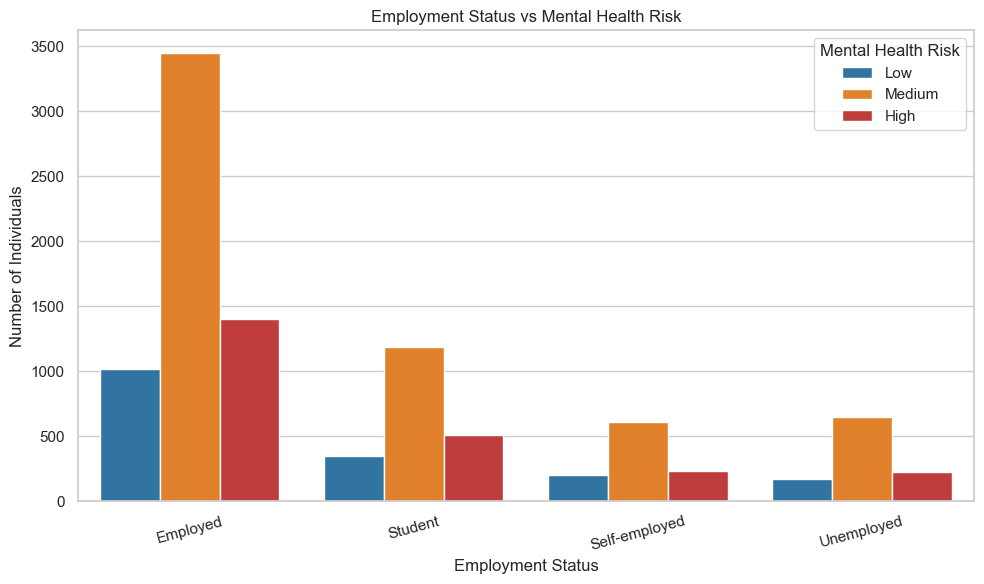

In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload data if needed
df = pd.read_csv("mental_health_dataset.csv")

# Confirm no missing values
df.dropna(subset=['employment_status', 'mental_health_risk'], inplace=True)

# Set the color palette
risk_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='employment_status',
    hue='mental_health_risk',
    order=['Employed', 'Student', 'Self-employed', 'Unemployed'],
    hue_order=['Low', 'Medium', 'High'],
    palette=risk_palette
)
plt.title('Employment Status vs Mental Health Risk')
plt.xlabel('Employment Status')
plt.ylabel('Number of Individuals')
plt.legend(title='Mental Health Risk')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64


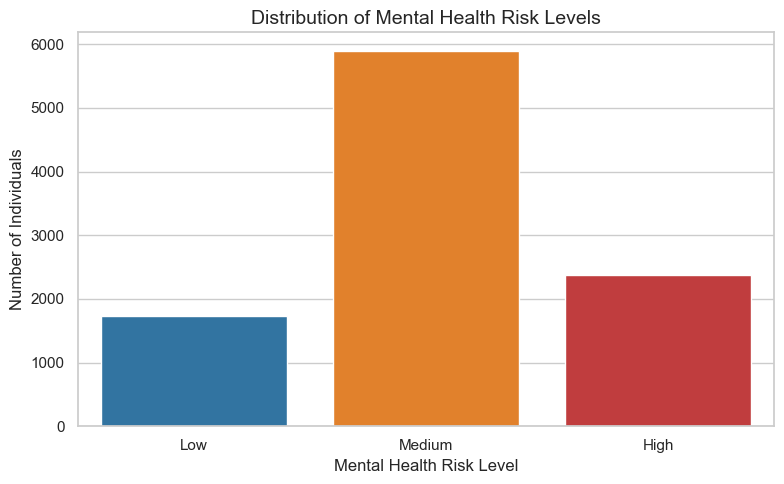

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load the dataset again to ensure original (not cleaned)
df = pd.read_csv("mental_health_dataset.csv")

# ✅ Remove any potential leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# ✅ Remove rows with missing mental_health_risk
df = df.dropna(subset=['mental_health_risk'])

# ✅ 
print(df['mental_health_risk'].value_counts())

# ✅ Color palette
risk_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# ✅ Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='mental_health_risk',
    hue='mental_health_risk',
    order=['Low', 'Medium', 'High'],
    hue_order=['Low', 'Medium', 'High'],
    palette=risk_palette,
    legend=False
)

plt.title('Distribution of Mental Health Risk Levels', fontsize=14)
plt.xlabel('Mental Health Risk Level')
plt.ylabel('Number of Individuals')
plt.tight_layout()
plt.show()


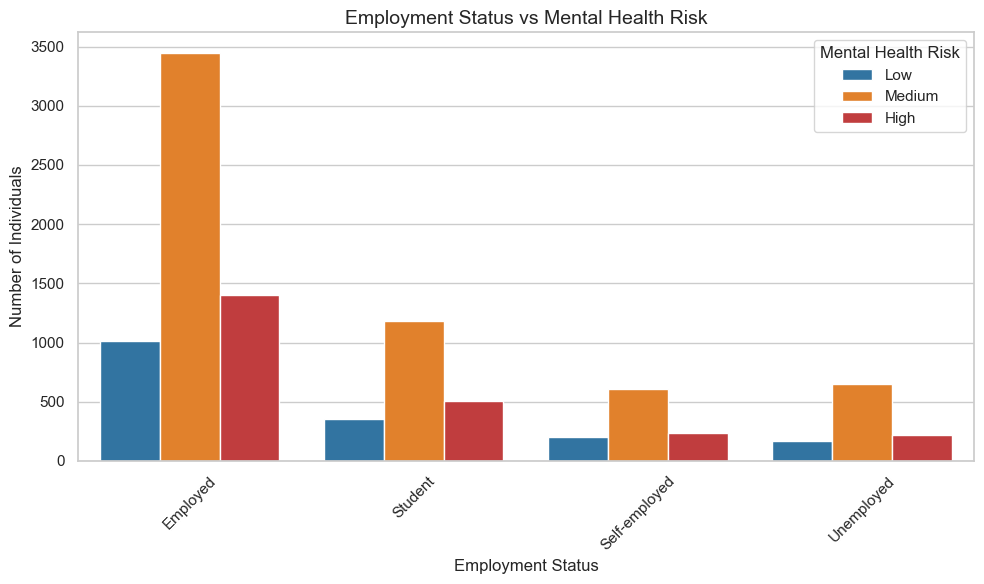

In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load original dataset to avoid using cleaned version
df = pd.read_csv("mental_health_dataset.csv")

# ✅ Clean column names (remove whitespace)
df.columns = df.columns.str.strip()

# ✅ Drop rows with missing target/hue column
df = df.dropna(subset=['mental_health_risk', 'employment_status'])

# ✅ Define color palette
risk_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# ✅ Set seaborn style (must be called)
sns.set_style("whitegrid")

# ✅ Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='employment_status',
    hue='mental_health_risk',
    order=df['employment_status'].value_counts().index,
    hue_order=['Low', 'Medium', 'High'],
    palette=risk_palette
)

plt.title('Employment Status vs Mental Health Risk', fontsize=14)
plt.xlabel('Employment Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Risk')
plt.tight_layout()
plt.show()


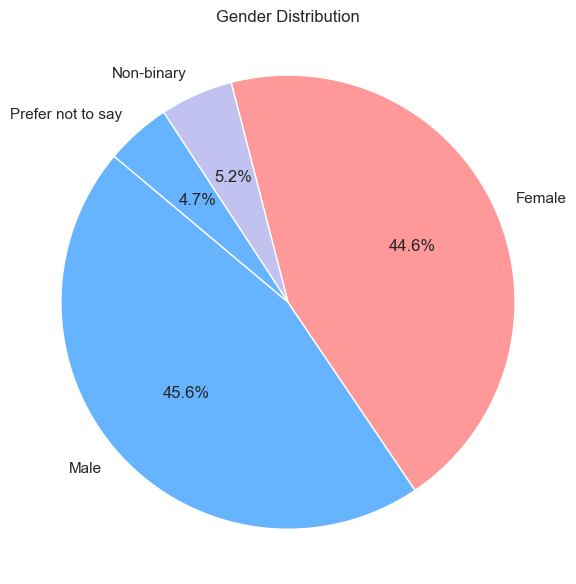

In [237]:
import matplotlib.pyplot as plt

# Gender distribution
gender_counts = df['gender'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999', '#c2c2f0'])
plt.title('Gender Distribution')
plt.axis('equal')  # Keeps it circular
plt.tight_layout()
plt.show()


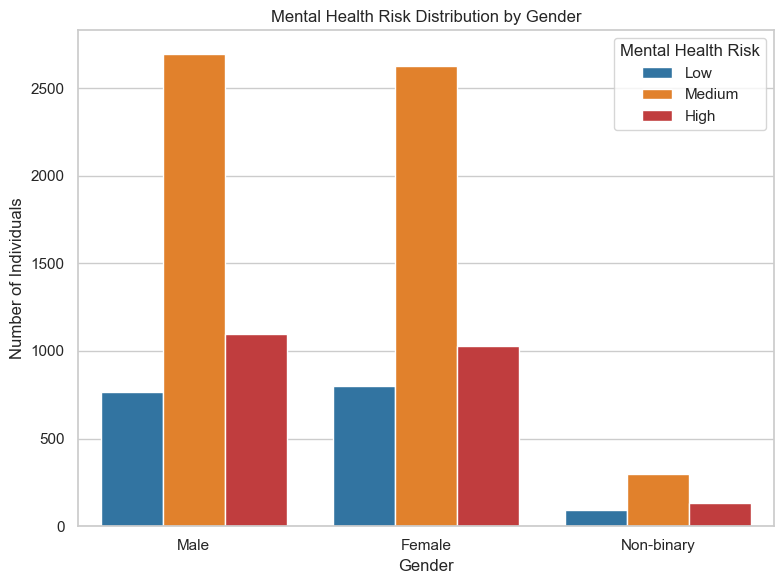

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(8, 6))

# Countplot: Gender × Mental Health Risk
sns.countplot(
    data=df,
    x='gender',
    hue='mental_health_risk',
    palette={'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'},
    order=['Male', 'Female', 'Non-binary'],
    hue_order=['Low', 'Medium', 'High']
)

# Title and labels
plt.title("Mental Health Risk Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Individuals")
plt.legend(title="Mental Health Risk")
plt.tight_layout()
plt.show()


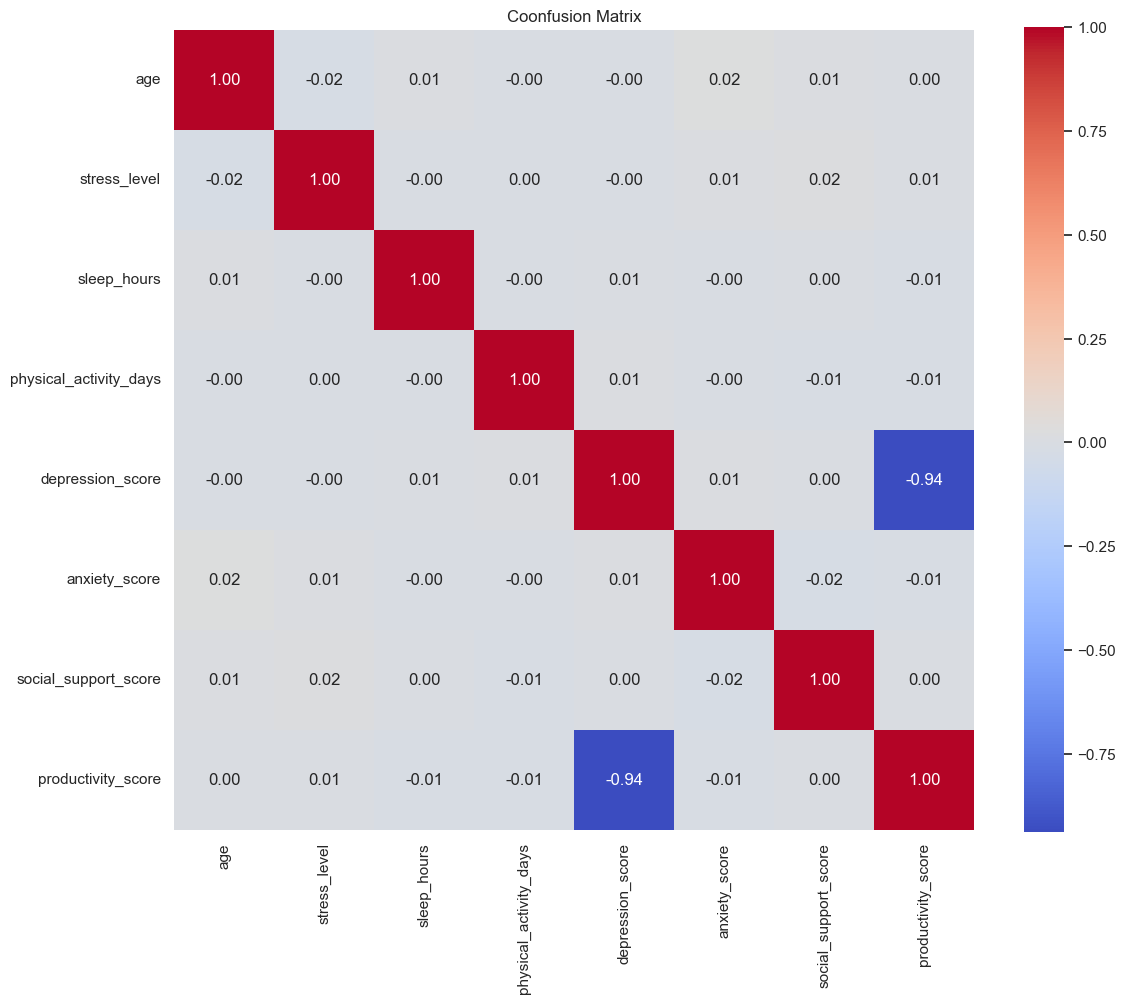

In [238]:
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Coonfusion Matrix")
plt.tight_layout()
plt.show()


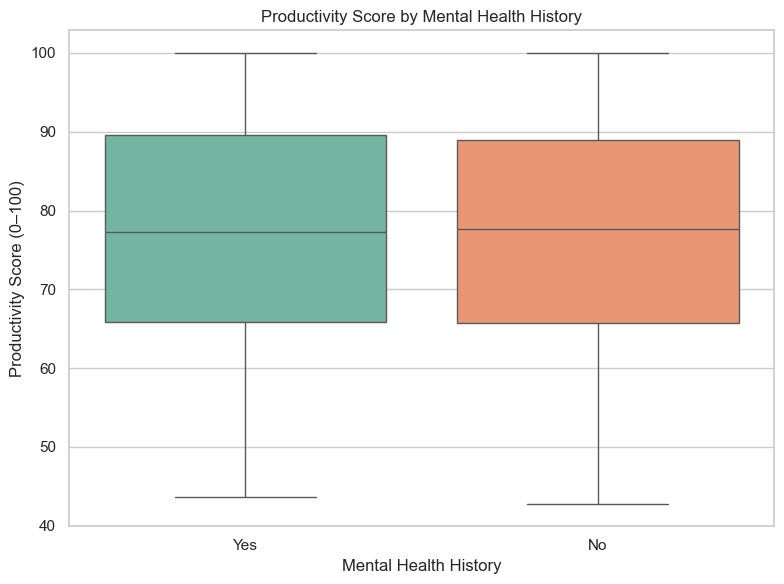

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='mental_health_history', y='productivity_score',
            hue='mental_health_history', palette='Set2', legend=False)

plt.title('Productivity Score by Mental Health History')
plt.xlabel('Mental Health History')
plt.ylabel('Productivity Score (0–100)')
plt.tight_layout()
plt.show()


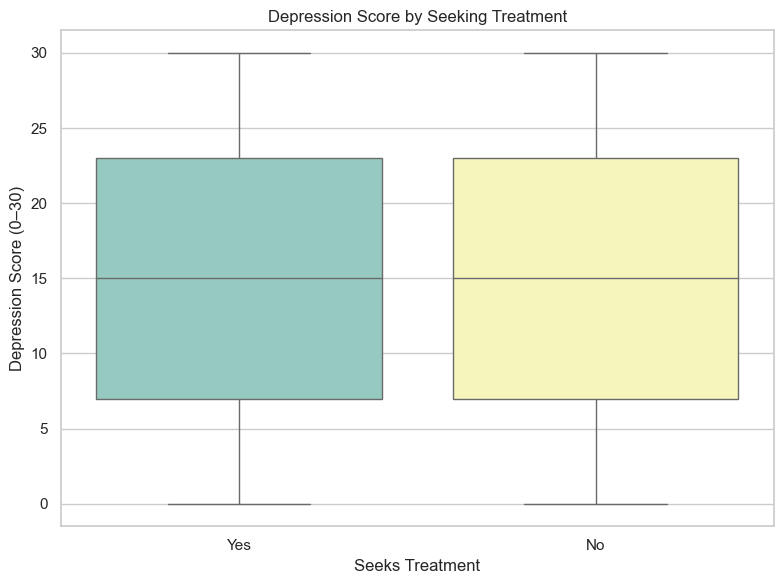

In [240]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='seeks_treatment', y='depression_score',
            hue='seeks_treatment', palette='Set3', legend=False)

plt.title('Depression Score by Seeking Treatment')
plt.xlabel('Seeks Treatment')
plt.ylabel('Depression Score (0–30)')
plt.tight_layout()
plt.show()


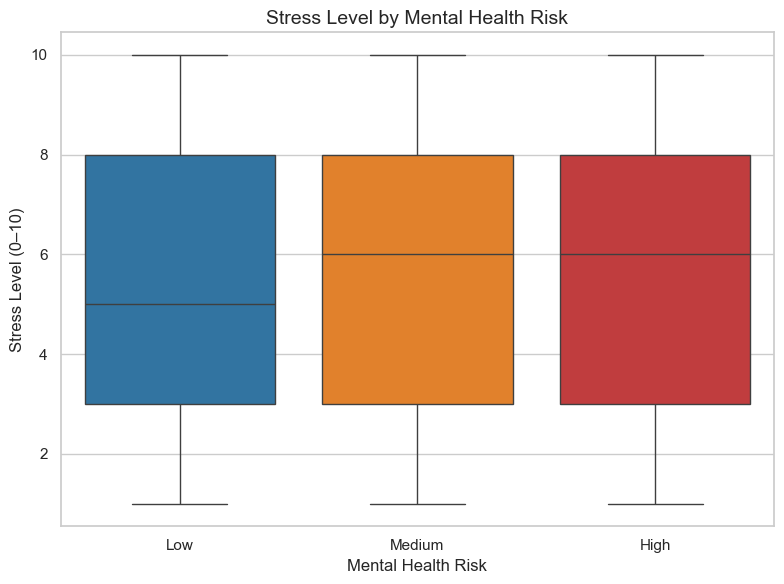

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='mental_health_risk', y='stress_level',
            hue='mental_health_risk', palette=custom_palette, legend=False,
            order=['Low', 'Medium', 'High'], hue_order=['Low', 'Medium', 'High'])

plt.title("Stress Level by Mental Health Risk", fontsize=14)
plt.xlabel("Mental Health Risk")
plt.ylabel("Stress Level (0–10)")
plt.tight_layout()
plt.show()


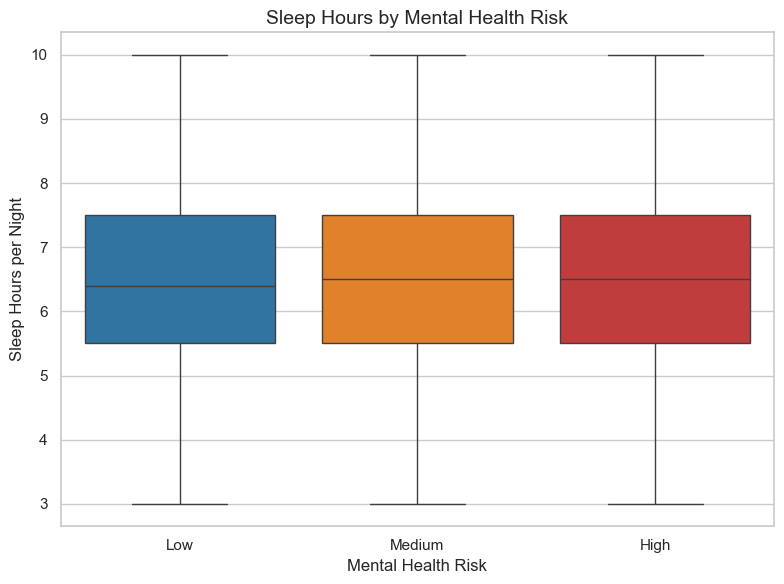

In [242]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='mental_health_risk', y='sleep_hours',
            hue='mental_health_risk', palette=custom_palette, legend=False,
            order=['Low', 'Medium', 'High'], hue_order=['Low', 'Medium', 'High'])

plt.title("Sleep Hours by Mental Health Risk", fontsize=14)
plt.xlabel("Mental Health Risk")
plt.ylabel("Sleep Hours per Night")
plt.tight_layout()
plt.show()


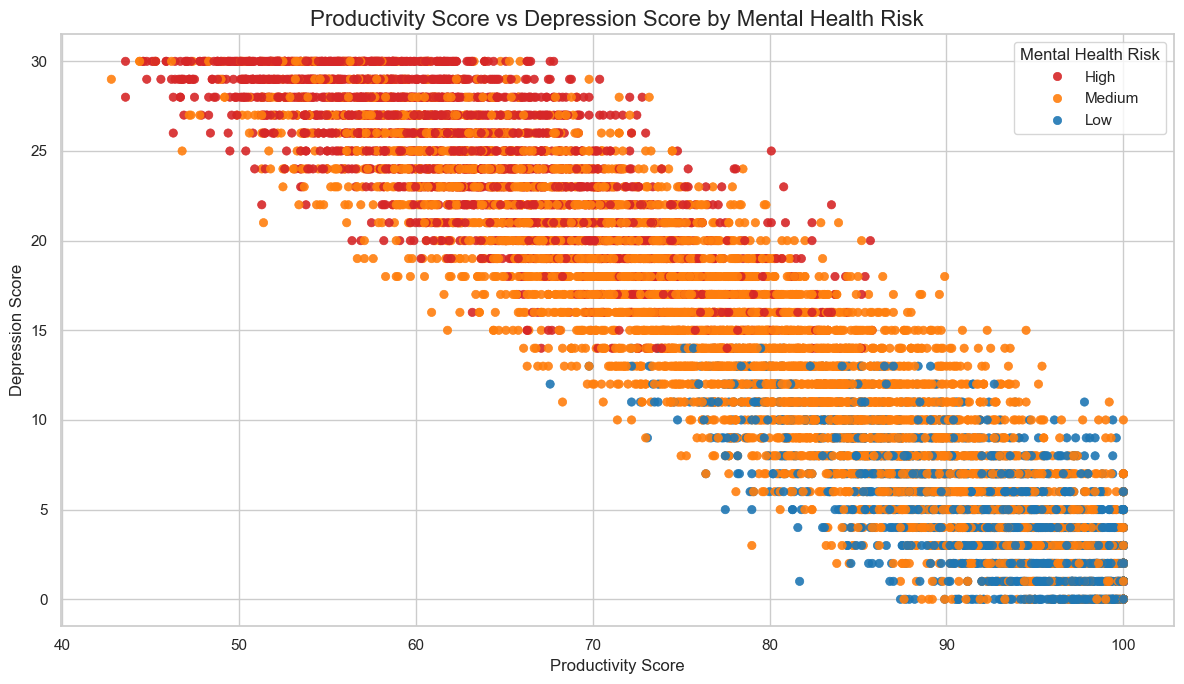

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='productivity_score',
    y='depression_score',
    hue='mental_health_risk',
    palette=custom_palette,
    alpha=0.9,
    edgecolor=None
)

# Plot formatting
plt.title('Productivity Score vs Depression Score by Mental Health Risk', fontsize=16)
plt.xlabel('Productivity Score')
plt.ylabel('Depression Score')
plt.legend(title='Mental Health Risk')
plt.tight_layout()
plt.show()


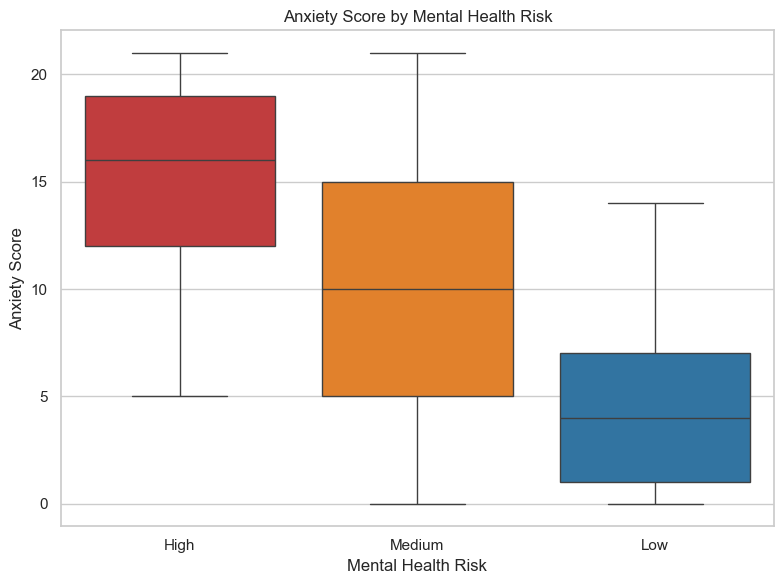

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='mental_health_risk',
    y='anxiety_score',
    data=df,
    hue='mental_health_risk',
    palette=custom_palette,
    legend=False
)
plt.title('Anxiety Score by Mental Health Risk')
plt.xlabel('Mental Health Risk')
plt.ylabel('Anxiety Score')
plt.tight_layout()
plt.show()


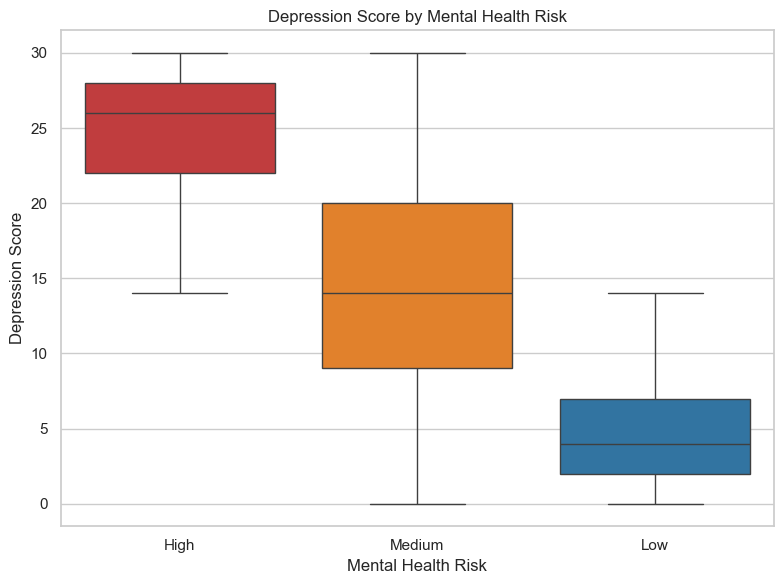

In [245]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='mental_health_risk',
    y='depression_score',
    data=df,
    hue='mental_health_risk',
    palette=custom_palette,
    legend=False
)
plt.title('Depression Score by Mental Health Risk')
plt.xlabel('Mental Health Risk')
plt.ylabel('Depression Score')
plt.tight_layout()
plt.show()


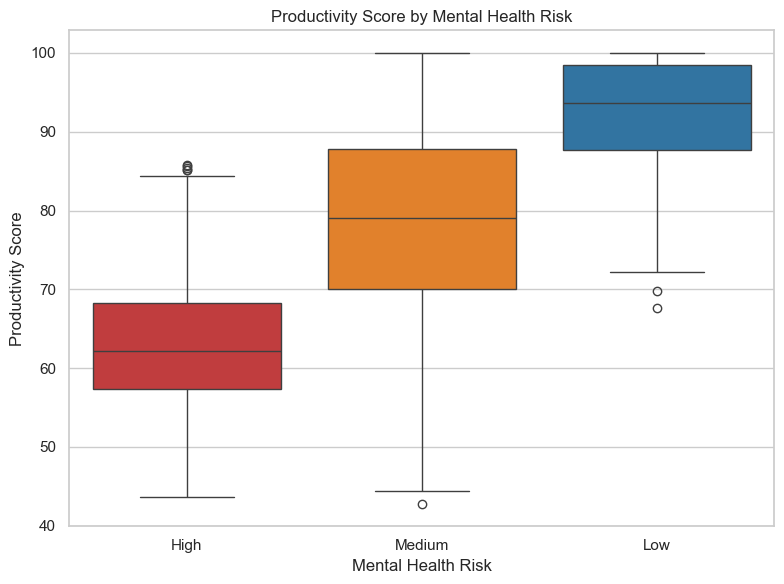

In [246]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='mental_health_risk',
    y='productivity_score',
    data=df,
    hue='mental_health_risk',
    palette=custom_palette,
    legend=False
)
plt.title('Productivity Score by Mental Health Risk')
plt.xlabel('Mental Health Risk')
plt.ylabel('Productivity Score')
plt.tight_layout()
plt.show()


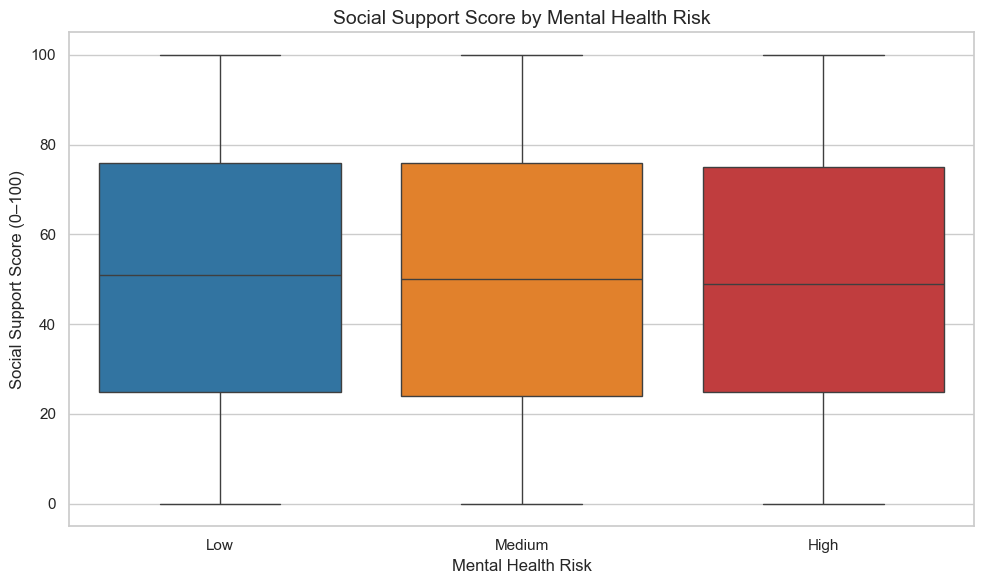

In [247]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='mental_health_risk',
    y='social_support_score',
    hue='mental_health_risk',
    palette={'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'},
    order=['Low', 'Medium', 'High'],
    legend=False
)
plt.title("Social Support Score by Mental Health Risk", fontsize=14)
plt.xlabel("Mental Health Risk")
plt.ylabel("Social Support Score (0–100)")
plt.tight_layout()
plt.show()


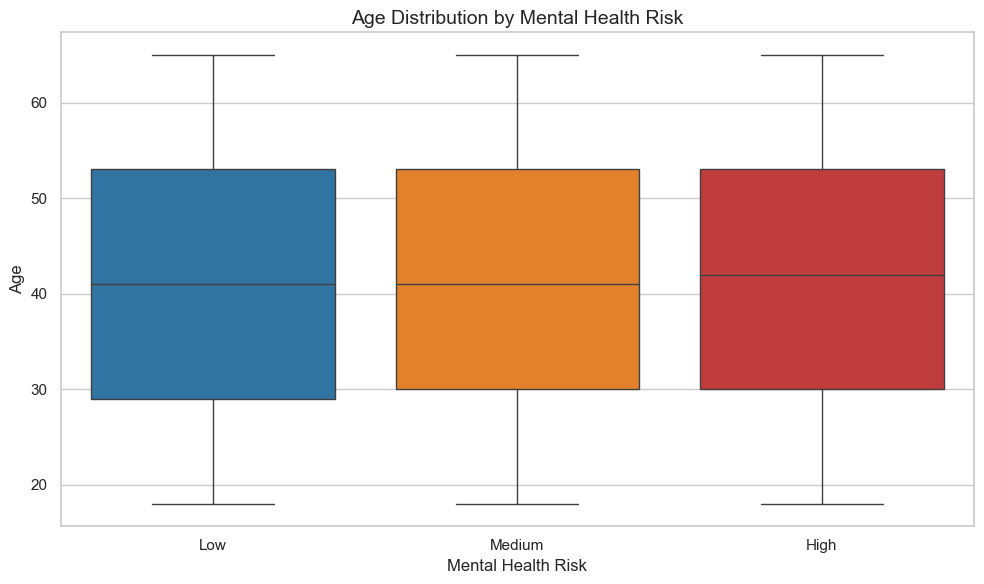

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='mental_health_risk',
    y='age',
    hue='mental_health_risk',
    palette=custom_palette,
    order=['Low', 'Medium', 'High'],
    legend=False  # No extra legend
)

plt.title("Age Distribution by Mental Health Risk", fontsize=14)
plt.xlabel("Mental Health Risk")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


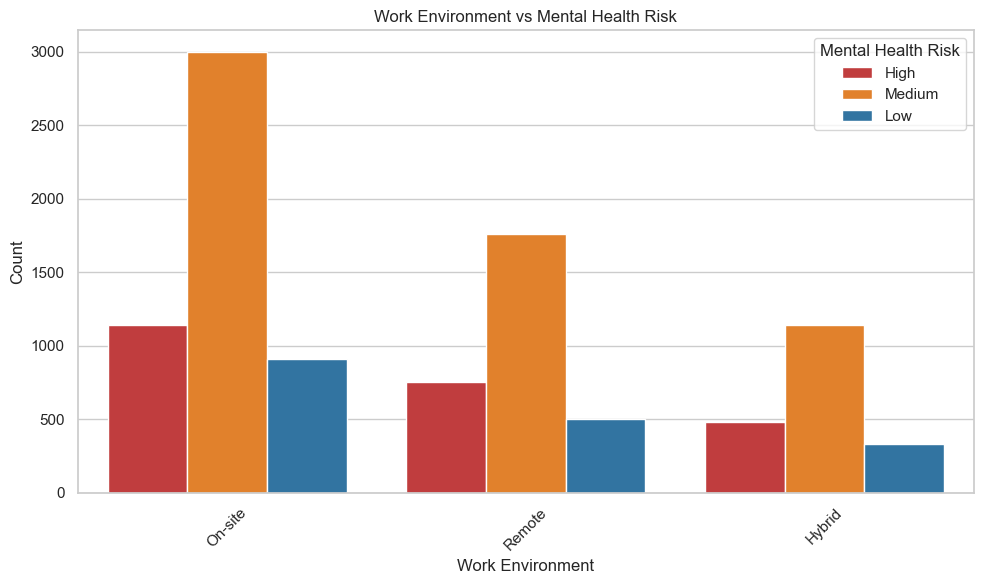

In [249]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='work_environment',  # Update this if your column name is different
    hue='mental_health_risk',
    palette=custom_palette
)
plt.title("Work Environment vs Mental Health Risk")
plt.xlabel("Work Environment")
plt.ylabel("Count")
plt.legend(title="Mental Health Risk")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


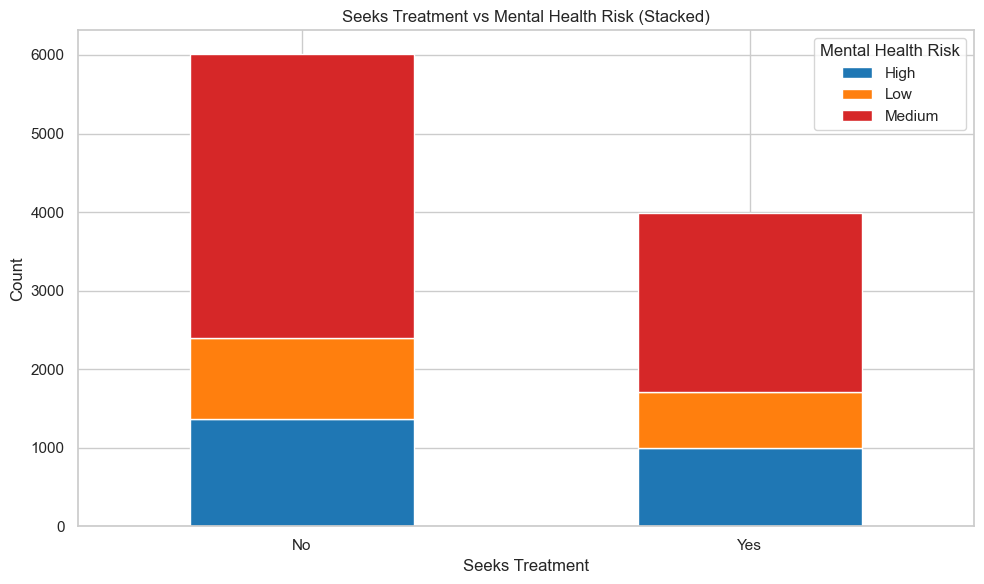

In [250]:
crosstab = pd.crosstab(df['seeks_treatment'], df['mental_health_risk'])
crosstab.plot(kind='bar', stacked=True, color=custom_palette.values(), figsize=(10, 6))
plt.title("Seeks Treatment vs Mental Health Risk (Stacked)")
plt.xlabel("Seeks Treatment")
plt.ylabel("Count")
plt.legend(title="Mental Health Risk")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


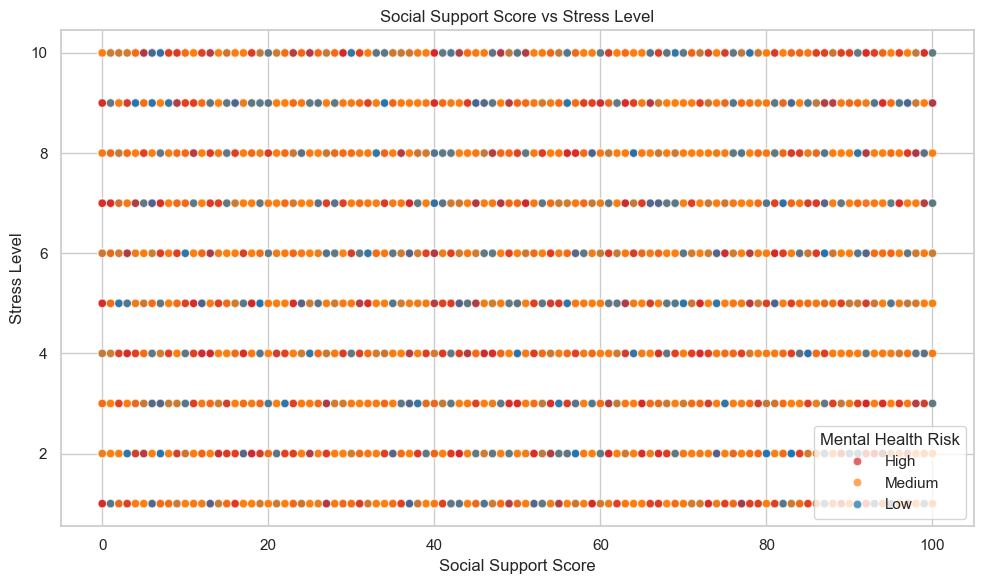

In [251]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='social_support_score',
    y='stress_level',  # <- Use the correct column name
    hue='mental_health_risk',
    palette=custom_palette,
    alpha=0.7
)

plt.title("Social Support Score vs Stress Level")
plt.xlabel("Social Support Score")
plt.ylabel("Stress Level")
plt.legend(title="Mental Health Risk")
plt.tight_layout()
plt.show()


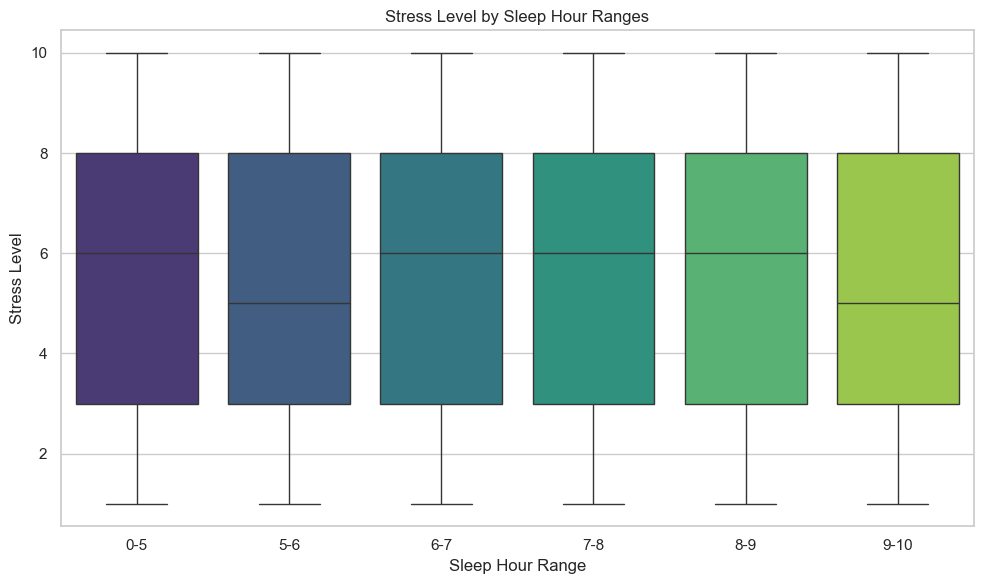

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define custom bins and labels
bins = [0, 5, 6, 7, 8, 9, 10]
labels = ["0-5", "5-6", "6-7", "7-8", "8-9", "9-10"]

# Create binned column with readable labels
df['sleep_bin'] = pd.cut(df['sleep_hours'], bins=bins, labels=labels, include_lowest=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='sleep_bin',
    y='stress_level',
    hue='sleep_bin',
    palette='viridis',
    legend=False
)
plt.title("Stress Level by Sleep Hour Ranges")
plt.xlabel("Sleep Hour Range")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()


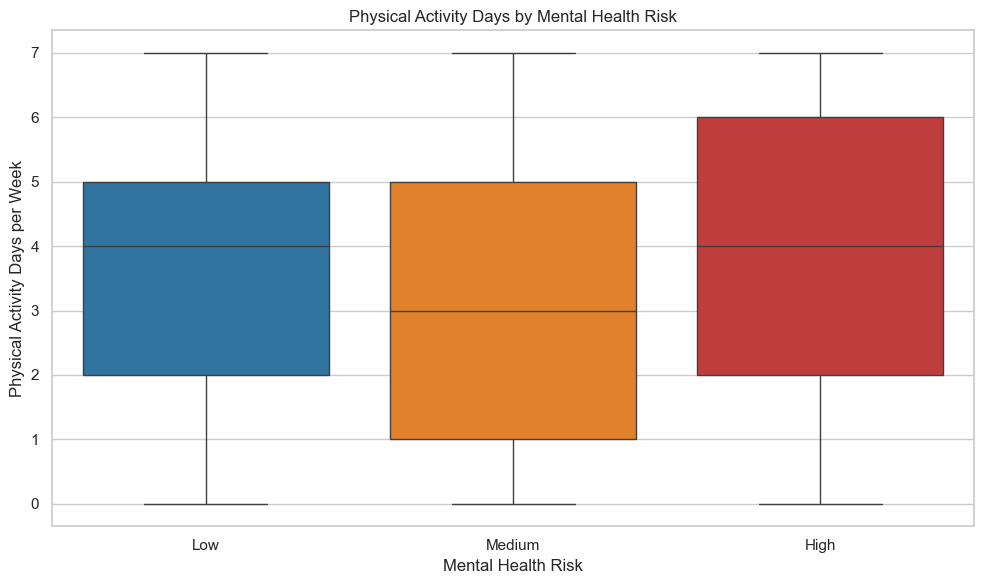

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='mental_health_risk',
    y='physical_activity_days',
    hue='mental_health_risk',
    palette=custom_palette,
    order=['Low', 'Medium', 'High'],
    legend=False
)
plt.title("Physical Activity Days by Mental Health Risk")
plt.xlabel("Mental Health Risk")
plt.ylabel("Physical Activity Days per Week")
plt.tight_layout()
plt.show()


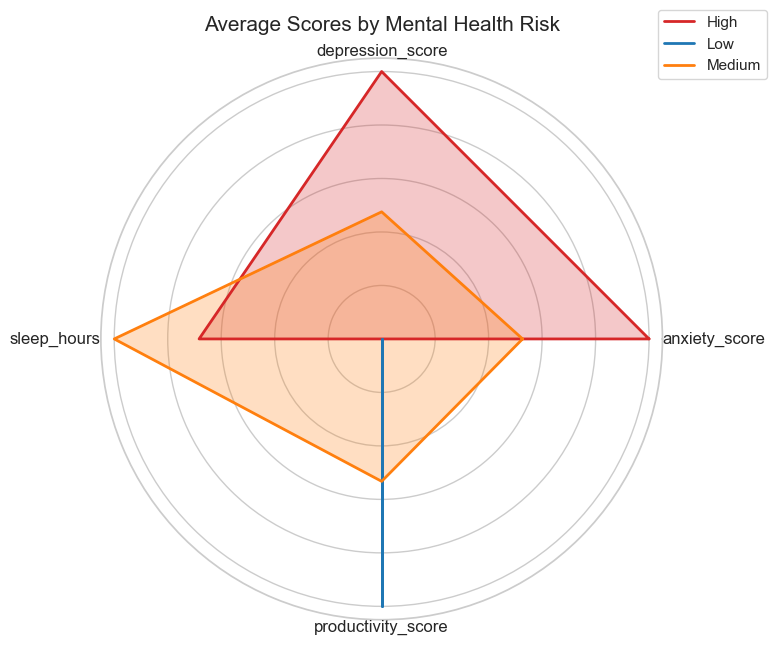

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = {'Low': '#1f77b4', 'Medium': '#ff7f0e', 'High': '#d62728'}

# Group and calculate means
radar_df = df.groupby('mental_health_risk')[
    ['anxiety_score', 'depression_score', 'sleep_hours', 'productivity_score']
].mean()

# Normalize values
radar_df_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# Setup radar chart
labels = radar_df_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for group in radar_df_norm.index:
    values = radar_df_norm.loc[group].tolist()
    values += values[:1]
    ax.plot(angles, values, label=group, color=custom_palette[group], linewidth=2)
    ax.fill(angles, values, alpha=0.25, color=custom_palette[group])

# Custom position for axis labels
label_angles = angles[:-1]
label_offsets = 1.05  # Push text away from axis

for i, label in enumerate(labels):
    angle = label_angles[i]
    ha = 'center'
    va = 'center'

    # Adjust horizontal and vertical alignment based on angle
    if angle == 0:
        ha = 'left'; va = 'center'
    elif angle == np.pi / 2:
        ha = 'center'; va = 'bottom'
    elif angle == np.pi:
        ha = 'right'; va = 'center'
    elif angle == 3 * np.pi / 2:
        ha = 'center'; va = 'top'

    ax.text(angle, label_offsets, label, size=12, horizontalalignment=ha, verticalalignment=va)

# Hide radial ticks and show legend
ax.set_yticklabels([])
ax.set_xticks([])  # Remove default labels

ax.set_title("Average Scores by Mental Health Risk", fontsize=15, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()


# Step 3 : Shuffle and Split the dataset

In [255]:
# Step 3: Shuffle and Split the Dataset
from sklearn.model_selection import train_test_split

X = df.drop('mental_health_risk', axis=1)
X = pd.get_dummies(X)  # keep X as DataFrame for feature_names_in_ to work

y = df['mental_health_risk'].to_numpy()  # only convert y to numpy

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (8000, 29)
Testing set: (2000, 29)


# Step 4: Set Model Hyper-parameters

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a more conservative hyperparameter grid
dt_param_grid = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10]
}

# GridSearchCV setup
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
dt_grid.fit(X_train, y_train)

# Get best model
dt_model = dt_grid.best_estimator_

# Evaluate
dt_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt_model.predict(X_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [257]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Define stricter regularization parameters
gb_param_grid = {
    "n_estimators": [30, 50],         # fewer trees
    "learning_rate": [0.05],          # slower learning
    "max_depth": [2],                 # very shallow trees
    "subsample": [0.6],               # stronger randomness
    "min_samples_leaf": [6, 8]        # larger leaves
}

# Run GridSearchCV
gb_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model
gb_grid.fit(X_train, y_train)

# Use best model and evaluate
gb_model = gb_grid.best_estimator_
gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train))
gb_test_acc = accuracy_score(y_test, gb_model.predict(X_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

# Best model and parameters
best_rf_params = rf_grid.best_params_
print("Best Random Forest Parameters:", best_rf_params)

# Final model using best params
rf_model = rf_grid.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [259]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    "C": [0.1, 1.0, 10.0],
    "solver": ["lbfgs"],
    "max_iter": [100, 200]
}

lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=3)
lr_grid.fit(X_train, y_train)

best_lr_params = lr_grid.best_params_
print("Best Logistic Regression parameters:", best_lr_params)


c:\Users\Anderson_Lie\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Anderson_Lie\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best Logistic Regression parameters: {'C': 10.0, 'max_iter': 200, 'solver': 'lbfgs'}


c:\Users\Anderson_Lie\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Step 5: Train the Model

In [260]:
from sklearn.tree import DecisionTreeClassifier

# Final Decision Tree with best parameters
dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [261]:
from sklearn.ensemble import RandomForestClassifier

# Final Random Forest with best parameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

In [262]:
from sklearn.ensemble import GradientBoostingClassifier

# Final Gradient Boosting with best parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=2,
    min_samples_leaf=6,
    n_estimators=50,
    subsample=0.6,
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=2, min_samples_leaf=6,
                           n_estimators=50, random_state=42, subsample=0.6)

In [263]:
from sklearn.linear_model import LogisticRegression

# Final Logistic Regression with best parameters
lr_model = LogisticRegression(
    C=1.0,
    solver='lbfgs',
    max_iter=100,
    random_state=42
)

# Train the model
lr_model.fit(X_train, y_train)


c:\Users\Anderson_Lie\miniconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# Step 6: Evaluate the Model

In [264]:
dt_train_preds = dt_model.predict(X_train)  # Decision Tree
rf_train_preds = rf_model.predict(X_train)  # Random Forest
gb_train_preds = gb_model.predict(X_train)  # Gradient Boosting
lr_train_preds = lr_model.predict(X_train)  # Logistic Regression

# Compute training accuracies
from sklearn.metrics import accuracy_score

print("Training Accuracy:")
print(f"Decision Tree:       {accuracy_score(y_train, dt_train_preds):.4f}")
print(f"Random Forest:       {accuracy_score(y_train, rf_train_preds):.4f}")
print(f"Gradient Boosting:   {accuracy_score(y_train, gb_train_preds):.4f}")
print(f"Logistic Regression: {accuracy_score(y_train, lr_train_preds):.4f}")


Training Accuracy:
Decision Tree:       0.9584
Random Forest:       0.9203
Gradient Boosting:   0.9437
Logistic Regression: 0.9543


In [265]:
from sklearn.metrics import accuracy_score

# Make predictions on test set
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Print accuracy scores
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_preds):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_preds):.4f}")



Decision Tree Accuracy: 0.9560
Random Forest Accuracy: 0.9045
Gradient Boosting Accuracy: 0.9405
Logistic Regression Accuracy: 0.9600


In [266]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics using average='weighted'
print("Decision Tree:")
print(f"Precision: {precision_score(y_test, dt_preds, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, dt_preds, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, dt_preds, average='weighted'):.4f}\n")

print("Random Forest:")
print(f"Precision: {precision_score(y_test, rf_preds, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, rf_preds, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, rf_preds, average='weighted'):.4f}\n")

print("Gradient Boosting:")
print(f"Precision: {precision_score(y_test, gb_preds, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, gb_preds, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, gb_preds, average='weighted'):.4f}\n")

print("Logistic Regression:")
print(f"Precision: {precision_score(y_test, lr_preds, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, lr_preds, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, lr_preds, average='weighted'):.4f}")


Decision Tree:
Precision: 0.9560
Recall:    0.9560
F1 Score:  0.9560

Random Forest:
Precision: 0.9126
Recall:    0.9045
F1 Score:  0.9019

Gradient Boosting:
Precision: 0.9453
Recall:    0.9405
F1 Score:  0.9394

Logistic Regression:
Precision: 0.9602
Recall:    0.9600
F1 Score:  0.9601


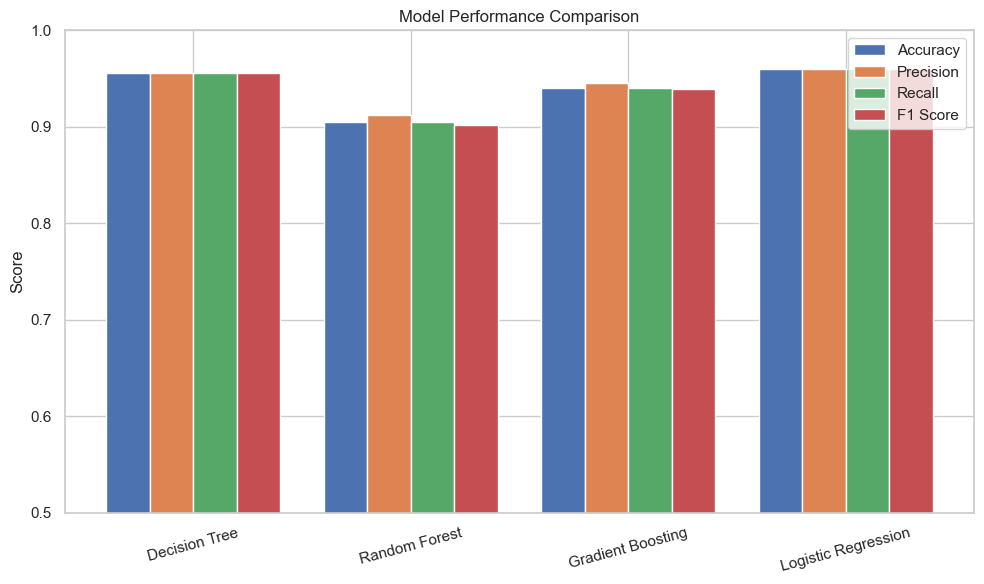

In [267]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics with average='weighted'
models = ["Decision Tree", "Random Forest", "Gradient Boosting", "Logistic Regression"]

accuracy = [
    accuracy_score(y_test, dt_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, gb_preds),
    accuracy_score(y_test, lr_preds)
]

precision = [
    precision_score(y_test, dt_preds, average='weighted'),
    precision_score(y_test, rf_preds, average='weighted'),
    precision_score(y_test, gb_preds, average='weighted'),
    precision_score(y_test, lr_preds, average='weighted')
]

recall = [
    recall_score(y_test, dt_preds, average='weighted'),
    recall_score(y_test, rf_preds, average='weighted'),
    recall_score(y_test, gb_preds, average='weighted'),
    recall_score(y_test, lr_preds, average='weighted')
]

f1 = [
    f1_score(y_test, dt_preds, average='weighted'),
    f1_score(y_test, rf_preds, average='weighted'),
    f1_score(y_test, gb_preds, average='weighted'),
    f1_score(y_test, lr_preds, average='weighted')
]

# Bar plot setup
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5 * width, precision, width, label='Precision')
plt.bar(x + 0.5 * width, recall, width, label='Recall')
plt.bar(x + 1.5 * width, f1, width, label='F1 Score')

plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(x, models, rotation=15)
plt.ylim(0.5, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


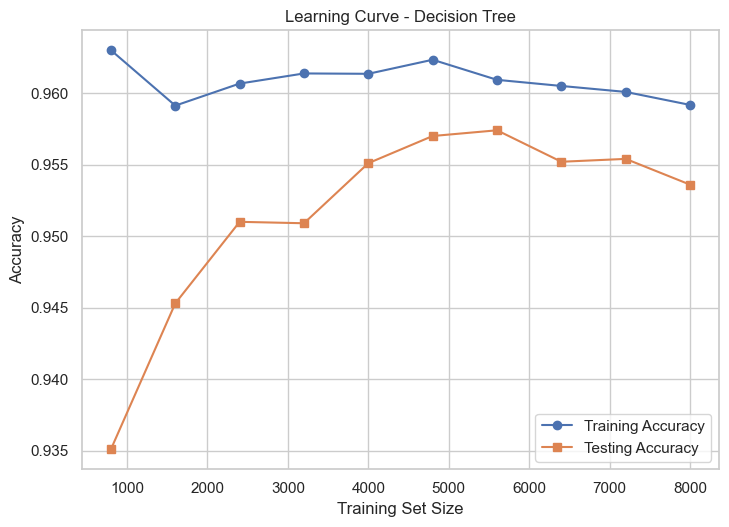

In [268]:
# Check if models are underfit or overfit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Decision Tree": dt_model
    }

# Plot setup
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
    plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s')
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


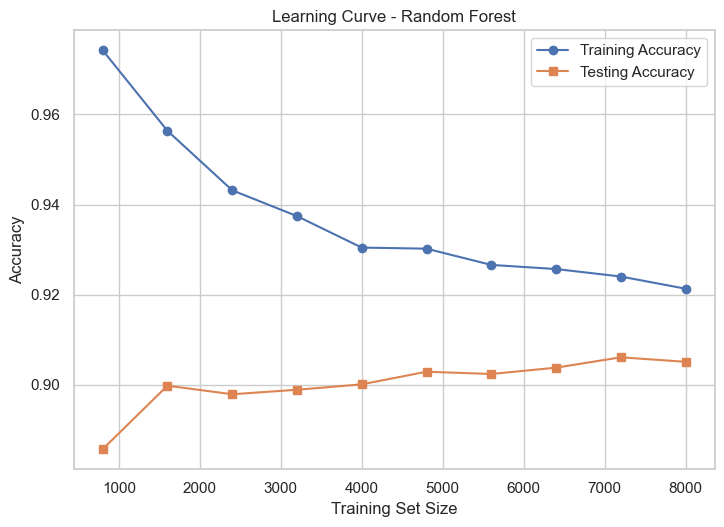

In [269]:
# Check if models are underfit or overfit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Random Forest": rf_model
}

# Plot setup
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
    plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s')
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


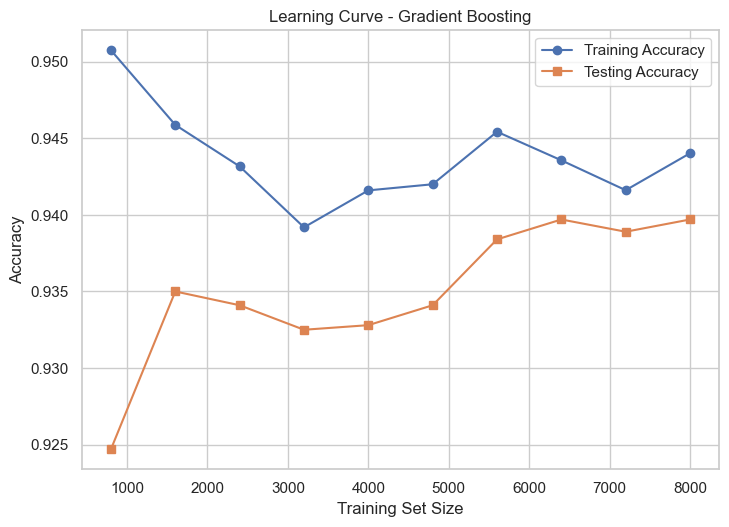

In [270]:
# Check if models are underfit or overfit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Gradient Boosting": gb_model
    }

# Plot setup
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
    plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s')
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


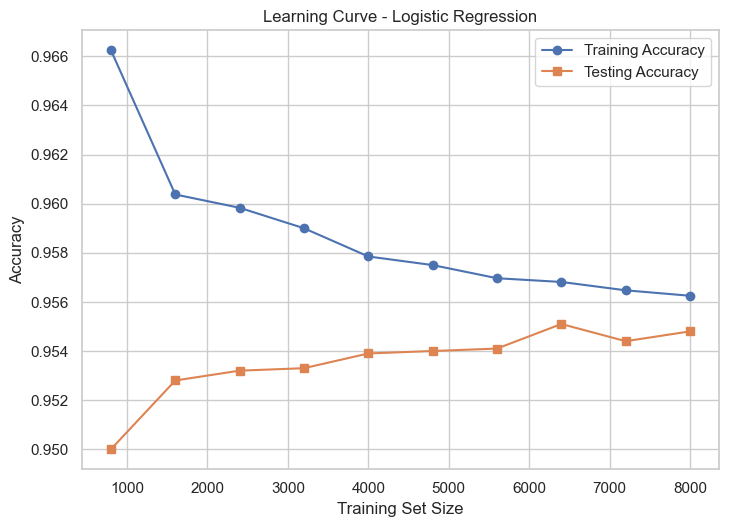

In [271]:
# Check if models are underfit or overfit
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Logistic Regression": lr_model
}

# Plot setup
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
    plt.plot(train_sizes, test_mean, label="Testing Accuracy", marker='s')
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


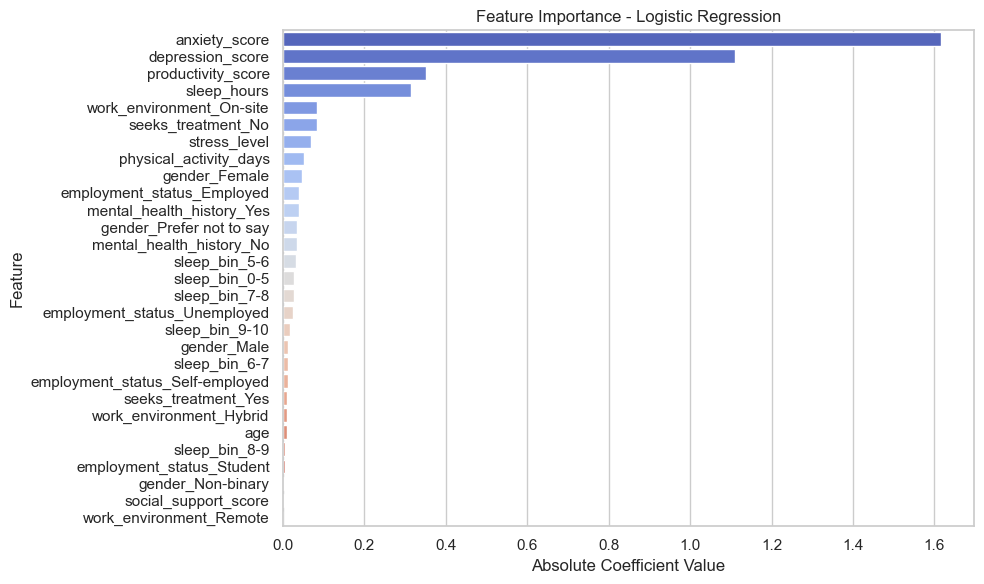

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})

# Add absolute value for importance
coef_df['Importance'] = coef_df['Coefficient'].abs()

# Sort by importance
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Importance', y='Feature', hue='Feature', dodge=False, palette='coolwarm', legend=False)
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Step 7: Deploy the Model

In [273]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load dataset
df = pd.read_csv("mental_health_dataset.csv")

# Make sure 'mental_health_risk' is not encoded
target = 'mental_health_risk'
X = df.drop(columns=target)
y = df[target]

# One-hot encode only input features
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Save the model
joblib.dump(dt_model, "mental_health_model.pkl")
print("✅ Model saved as 'mental_health_model.pkl'")


✅ Model saved as 'mental_health_model.pkl'


In [ ]:
# Load model
dt_model = joblib.load("mental_health_model.pkl")

# Example input
example_input = pd.DataFrame({
    'gender': ['Female'],
    'employment_status': ['Employed'],
    'work_environment': ['On-site'],
    'mental_health_history': ['Yes'],
    'seeks_treatment': ['Yes'],
    'stress_level': [7],
    'sleep_hours': [6.5],
    'physical_activity_days': [3],
    'age': [30],
    'depression_score': [20],
    'anxiety_score': [12],
    'social_support_score': [60],
    'productivity_score': [70]
})

# Encode and align input
example_input_encoded = pd.get_dummies(example_input)
example_input_encoded = example_input_encoded.reindex(columns=dt_model.feature_names_in_, fill_value=0)

# Predict
prediction = dt_model.predict(example_input_encoded)
print("🧠 Predicted Mental Health Risk:", prediction[0])


🧠 Predicted Mental Health Risk: Medium
